In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from numpy import log
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels


plt.rcParams.update({'figure.figsize':(9, 7), 'figure.dpi':120})

# File_Input_Path = "D:\Pranto\study\4_1\Computer_Simulation_and_Modeling\Lab\Forecast\"
# Input_File_Name = File_Input_Path + "wwwusage" + ".csv"

# df = read_csv(Input_File_Name, names=['value'], header=0)
df = read_csv('./wwwusage.csv', names=['value'], header=0)

#### The optimal ARIMA model manually using Out-of-Time Cross validation

# Build Model 1
# 1,1,1 ARIMA Model for whole dataset
model = ARIMA(df.value, order=(1,1,1))
# model = statsmodels.api.tsa.arima.ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Mon, 22 Jan 2024   AIC                            514.300
Time:                        14:38:37   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

c:\Users\ashiq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


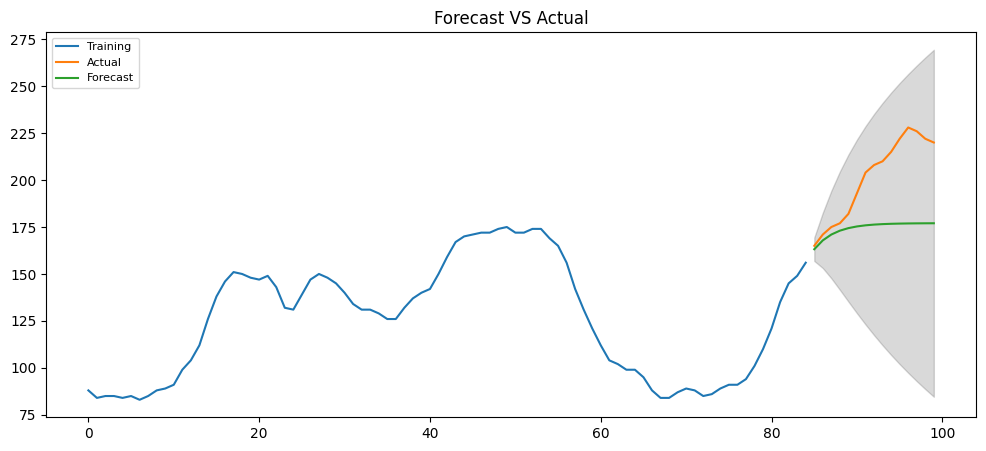

c:\Users\ashiq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


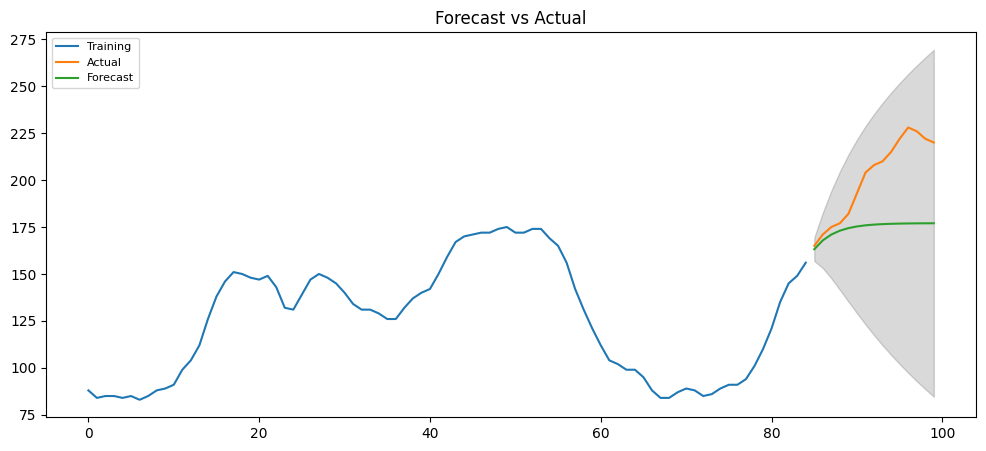

In [2]:

# Create Training and Test
size = int(len(df) * 0.85)
train = df.value[:size]
test = df.value[size:]
## Split the dataset into train ((36 observations)) and test (12 observations)

# Build Model 2
model = ARIMA(train, order=(1, 1, 1)).fit()
# model = statsmodels.api.tsa.arima.ARIMA(train, order=(1, 1, 1))
# fitted = model.fit(disp=-1)
# fitted = model.fit()
# print(fitted.summary())


# Forecast
# fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf
# forecast_values = fitted.forecast(len(test), alpha=0.05)  # 95% conf
fc = model.get_forecast(len(test), alpha=0.05)

# Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
fc_series = fc.predicted_mean
conf_int = fc.conf_int()

lower_series = conf_int.iloc[:, 0]
upper_series = conf_int.iloc[:, 1]
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

'''
Above ARIMA(1,1,1) model seems to give a directionally correct forecast.
And the actual observed values lie within the 95% confidence band.
That seems fine.

But each of the predicted forecasts is consistently below the actuals.
That means, by adding a small constant to our forecast,
the accuracy will certainly improve.
So, there is definitely scope for improvement.
'''

# Build Model 2
model = ARIMA(train, order=(3, 2, 1))

fitted = model.fit()
# print(fitted.summary())

# # Forecast
fc = fitted.forecast(len(test), alpha=0.05)  # 95% conf
# forecast_values = fitted.forecast(len(test), alpha=0.05)  # 95% conf
# fc = forecast_values[0]
# se = forecast_values[1]
# conf = forecast_values[2]
# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()